In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load data:

In [3]:
download_dir = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/'
df_c = pd.read_csv(download_dir + 'time_series_19-covid-Confirmed.csv')
df_d = pd.read_csv(download_dir + 'time_series_19-covid-Deaths.csv')
df_r = pd.read_csv(download_dir + 'time_series_19-covid-Recovered.csv')

Reformat:

In [4]:
df_c = df_c.groupby(['Country/Region']).sum().drop(columns=['Lat','Long']).T.rename(columns={'Iran (Islamic Republic of)': 'Iran'})
df_d = df_d.groupby(['Country/Region']).sum().drop(columns=['Lat','Long']).T.rename(columns={'Iran (Islamic Republic of)': 'Iran'})
df_r = df_r.groupby(['Country/Region']).sum().drop(columns=['Lat','Long']).T.rename(columns={'Iran (Islamic Republic of)': 'Iran'})
df_c.columns.name = ''
df_d.columns.name = ''
df_r.columns.name = ''

Reformat dates:

In [5]:
last_date = df_c.index[-1]
df_c.index = np.arange(df_c.shape[0])[::-1]*-1
df_d.index = np.arange(df_d.shape[0])[::-1]*-1
df_r.index = np.arange(df_r.shape[0])[::-1]*-1

Compute number of closed cases as reported deaths + reported recoveries:

In [6]:
df_closed = df_d + df_r

Select countries to plot. Here I select only those countries with >1000 reported cases:

In [7]:
ind_cases = df_c.iloc[-1] > 1000
country_list = df_c.columns[ind_cases]
colors = sns.color_palette(n_colors=len(country_list))

Show what the data looks like:

In [8]:
df_c.loc[:,df_c.columns.isin(country_list)].tail()

,France,Germany,Iran,Italy,Mainland China,Republic of Korea,Spain,US
-4,653,670,4747,4636,80573,6593,400,267
-3,949,799,5823,5883,80652,7041,500,403
-2,1126,1040,6566,7375,80699,7314,673,518
-1,1209,1176,7161,9172,80735,7478,1073,584
0,1784,1457,8042,10149,80757,7513,1695,1670


Let's start with plotting the total numbr of cases:

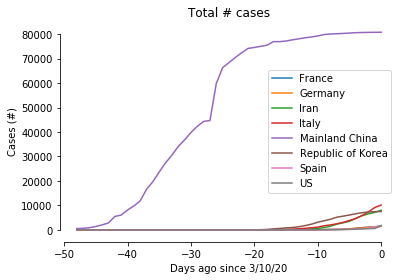

In [9]:
for country, color in zip(country_list, colors):
    plt.plot(df_c.loc[:,country], color=color, label=country)
plt.legend()
plt.title('Total # cases')
plt.xlabel('Days ago since {}'.format(last_date))
plt.ylabel('Cases (#)')
sns.despine(offset=2, trim=True)

The same, but now excluding China:

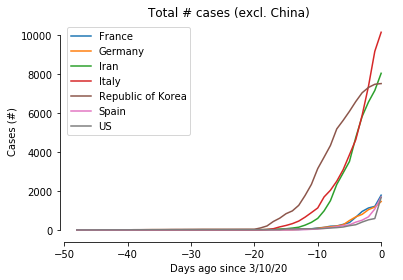

In [10]:
for country, color in zip(country_list, colors):
    if not country == 'Mainland China':
        plt.plot(df_c.loc[:,country], color=color, label=country)
        # plt.plot(df_c.loc[:,country].diff(), label=country)
plt.legend()
plt.title('Total # cases (excl. China)')
plt.xlabel('Days ago since {}'.format(last_date))
plt.ylabel('Cases (#)')
sns.despine(offset=2, trim=True)

Let's look at fatality rates. The two ways to do so are:  
-- Deaths/Total Cases.  
-- Deaths/Closed Cases.  
Let's compute these numbers:

In [11]:
df_d_f_total = (df_d/df_c*100)
df_d_f_closed = (df_d/df_closed*100)

Plot these metrics for China:

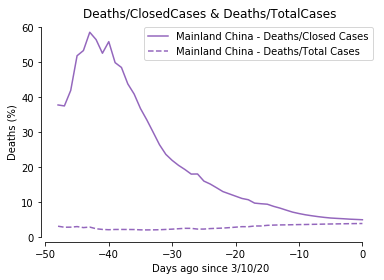

In [12]:
for country, color in zip(country_list, colors):
    if (country == 'Mainland China'):
        plt.plot(df_d_f_closed.loc[:,country], color=color, label=country + ' - Deaths/Closed Cases')
        plt.plot(df_d_f_total.loc[:,country], ls='--', color=color, label=country + ' - Deaths/Total Cases')
plt.legend()
plt.title('Deaths/ClosedCases & Deaths/TotalCases')
plt.xlabel('Days ago since {}'.format(last_date))
plt.ylabel('Deaths (%)')
sns.despine(offset=2, trim=True)

***Deaths/Total Cases*** is likely to be an underestimate, because lots of open cases can still end up in death.  
***Death/Closed Cases*** is an overestimate, because it’s likely that deaths are closed quicker than recoveries.  
That we see the two measures converge in the case of China indicates that epidemic is coming to an end.  
See also: https://medium.com/@tomaspueyo/coronavirus-act-today-or-people-will-die-f4d3d9cd99ca.  
We also see that fatality rate of COVID19 *in China* is roughly 3 to 5%. To be precise:

In [17]:
print('Deaths/Total Cases = {}%'.format(round(df_d_f_total['Mainland China'].iloc[-1],3)))
print('Deaths/Closed Cases = {}%'.format(round(df_d_f_closed['Mainland China'].iloc[-1],3)))

Deaths/Total Cases = 3.883%
Deaths/Closed Cases = 4.959%


This number is important. For example, if your city reported 5 COVID19-related deaths, that indicates that there are probably ~100 infected people walking around. These cases might not be reported yet due to a number of factors, including: (i) persons not ill yet, because of upto 14 days incubation time, (ii) a shortage of test kits, etc...

Let's plot the difference between Deaths/Closed Cases and Deaths/Total Cases:

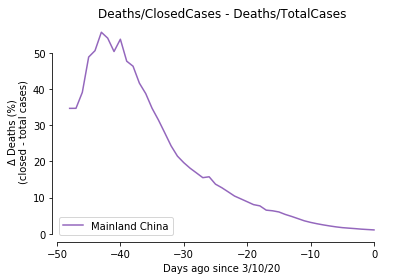

In [18]:
for country, color in zip(country_list, colors):
    if (country == 'Mainland China'):
        plt.plot(df_d_f_closed.loc[:,country]-df_d_f_total.loc[:,country], color=color, label=country)
plt.legend(loc=3)
plt.title('Deaths/ClosedCases - Deaths/TotalCases')
plt.xlabel('Days ago since {}'.format(last_date))
plt.ylabel('Δ Deaths (%)\n(closed - total cases)')
# plt.twinx()
# for country, color in zip(country_list, colors):
#     if (country == 'Mainland China'):
#         plt.plot(df_c.loc[:,country], color=color)
# plt.ylabel('Cases (#)')
sns.despine(offset=2, trim=True)

You see that this difference is peaks in China roughly 44 days ago. This was just before the big outbreak in that country (see first figure above).

Let's plot the same for the other countries:

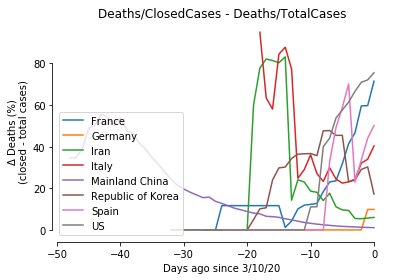

In [19]:
for country, color in zip(country_list, colors):
    plt.plot(df_d_f_closed.loc[:,country]-df_d_f_total.loc[:,country], color=color, label=country)
plt.legend(loc=3)
plt.title('Deaths/ClosedCases - Deaths/TotalCases')
plt.xlabel('Days ago since {}'.format(last_date))
plt.ylabel('Δ Deaths (%)\n(closed - total cases)')   
# plt.twinx()
# for country, color in zip(country_list, colors):
#     plt.plot(df_c.loc[:,country], color=color)
# plt.ylabel('Cases (#)')
sns.despine(offset=2, trim=True)

You see two more peaks for Iran and Italy roughly 16 days ago. These peaks were even higher than the one observed for China, and occured just before the big outbreaks in those countries (see second figure above). You see that The US, France, and Spain are ramping to similar levels, and exponential outbreaks seem imminent. Even Italy has to brace itself for a second wave... 